<a href="https://colab.research.google.com/github/CypherTyphoon/Machine-KI_Learning/blob/main/Tag_15_Donnerstag_18042024_News_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laden und erste Ansicht des Datensatzes**

In [1]:
#Laden des Datensatzes und Anzeigen der ersten 5 Reihen
import pandas as pd

news_data = pd.read_csv('news.csv')

#Datenansicht ersten 5 Zeilen
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


**Informationen über den Datensatz und statistische Zusammenfassung für numerische Variablen**

In [4]:
# Informationen über den Datensatz anzeigen
print(news_data.info())

# Statistische Zusammenfassung für numerische Variablen
print(news_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6335 non-null   float64
 1   title       6335 non-null   object 
 2   text        6335 non-null   object 
 3   label       6335 non-null   object 
dtypes: float64(1), object(3)
memory usage: 198.1+ KB
None
         Unnamed: 0
count  6.335000e+03
mean  -9.758045e-17
std    1.000079e+00
min   -1.737313e+00
25%   -8.576988e-01
50%   -3.099015e-03
75%    8.625268e-01
max    1.736710e+00


**Überprüfung auf fehlende Werte** (Ausgabe in "Tabellen-Form")

In [2]:
# Berechnung der fehlenden Werte
missing_data = news_data.isna().sum()

# Gesamtanzahl der Einträge
total_entries = len(news_data)

# Erstellen eines neuen DataFrame mit den Informationen über fehlende Daten
missing_info = pd.DataFrame({
    'Spalte': missing_data.index,
    'Fehlende Werte': missing_data.values,
    'Gesamt': [total_entries] * len(missing_data)
})

# Formatieren des DataFrame in einen String ohne Index-Spalte
formatted_missing_info = missing_info.to_string(index=False)

# Drucken der formatierten Liste
print(formatted_missing_info)

    Spalte  Fehlende Werte  Gesamt
Unnamed: 0               0    6335
     title               0    6335
      text               0    6335
     label               0    6335


Ausgabe zeigt: "0 Fehler in den Spalten Unnamed: 0, title, text und label

**Behandlung der Spalte Unnamed: 0** (Datenbereinigung)

In [7]:
# Spalte 'Unnamed: 0' entfernen
news_data = news_data.drop('Unnamed: 0', axis=1)

#Datenansicht ersten 5 Zeilen nach der Entfernung
news_data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


**Explorative Datenanalyse**

1. Verteilung von FAKE zu REAL

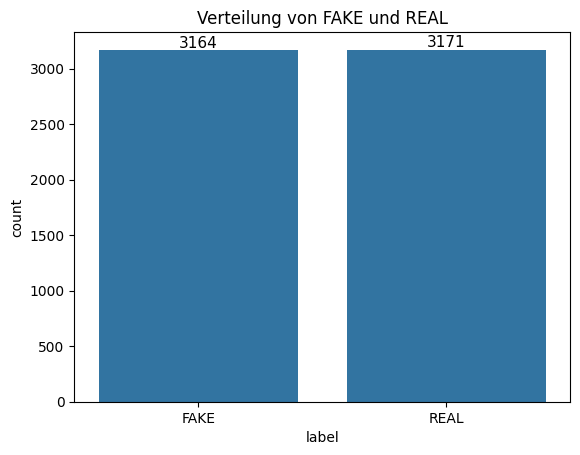

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verteilung der Labels anzeigen
ax = sns.countplot(x='label', data=news_data)
plt.title('Verteilung von FAKE und REAL')

# Annotate jeden Balken mit der Anzahl
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

2. Verhältnis benutzte Buchstaben in Titel zu Text in Bezug auf Fake oder Real?

In [9]:
# Berechnen des Verhältnisses von Buchstaben im Titel zu Buchstaben im Text
news_data['title_length'] = news_data['title'].apply(len)
news_data['text_length'] = news_data['text'].apply(len)
news_data['title_text_ratio'] = news_data['title_length'] / news_data['text_length']

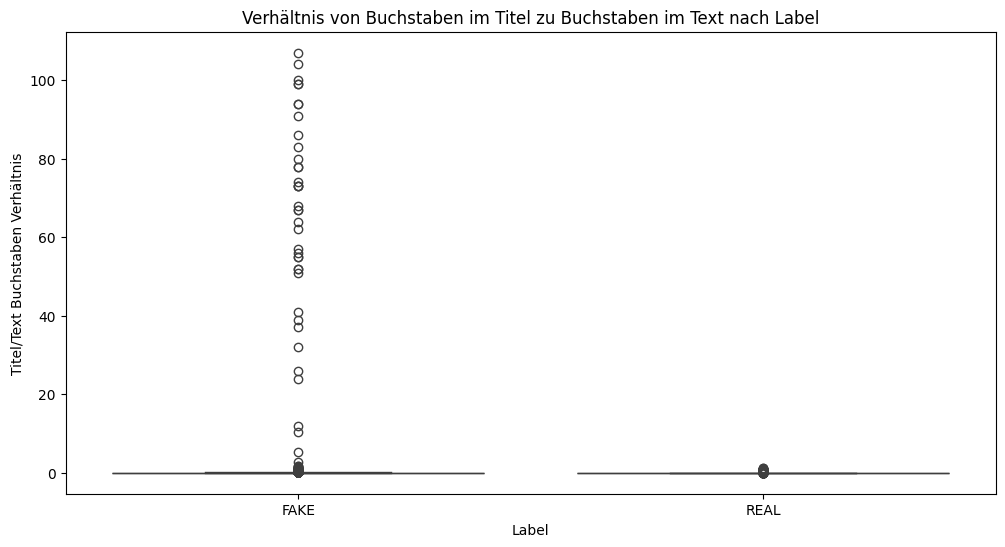

In [10]:
# Unterschiede zwischen FAKE und REAL analysieren
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot zur Visualisierung der Verhältnisse
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='title_text_ratio', data=news_data)
plt.title('Verhältnis von Buchstaben im Titel zu Buchstaben im Text nach Label')
plt.xlabel('Label')
plt.ylabel('Titel/Text Buchstaben Verhältnis')
plt.show()

In [ ]:
# Statistische Untersuchung
from scipy.stats import mannwhitneyu

# Mann-Whitney-U-Test
fake = news_data[news_data['label'] == 'FAKE']['title_text_ratio']
real = news_data[news_data['label'] == 'REAL']['title_text_ratio']
stat, p = mannwhitneyu(fake, real)

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Das Verhältnis zwischen Titel und Text ist statistisch nicht signifikant unterschiedlich zwischen FAKE und REAL News.')
else:
    print('Das Verhältnis zwischen Titel und Text ist statistisch signifikant unterschiedlich zwischen FAKE und REAL News.')

**Vorbereitung der Textdaten für das Modell / die Modelle**

Zerlegung der Text nach nltk

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Lade die notwendigen NLTK-Ressourcen herunter
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Stopwörter und Lemmatizer initialisieren
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenisieren, Stopwörter entfernen und lemmatisieren
    words = nltk.word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return " ".join(filtered_words)

# Textdaten vorverarbeiten
news_data['text_processed'] = news_data['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Modellierung**

1. Modell Logistische Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Textvektorisierung
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(news_data['text_processed'])
y = news_data['label']

# Datensatz teilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modell trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# Vorhersagen machen und auswerten
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Genauigkeit konkret ausgeben
from sklearn.metrics import accuracy_score

# Vorhersagen machen
predictions = model.predict(X_test)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, predictions)
print("Genauigkeit der logistischen Regression:", accuracy)

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.92       968
        REAL       0.93      0.89      0.91       933

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901

Genauigkeit der logistischen Regression: 0.911625460284061


2. Modell Random Forest mit Textvorbereitung nach "nltk" und der Umwandlung von Text in numerische Features nach "TfidfVectorizer"

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK-Ressourcen herunterladen
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Stopwörter und Lemmatizer initialisieren
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenisieren, Stopwörter entfernen und lemmatisieren
    words = nltk.word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return " ".join(filtered_words)

# Textdaten vorverarbeiten
news_data['text_processed'] = news_data['text'].apply(preprocess_text)

In [22]:
# Text in numerische Features umwandeln
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(news_data['text_processed']).toarray()
y = news_data['label'].map({'FAKE': 0, 'REAL': 1}).values

# Aufteilen der Daten
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modellierung mit Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Modellbewertung
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_classifier.predict(X_test)
print("Genauigkeit:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Genauigkeit: 0.9131807419100236
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       628
           1       0.91      0.92      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



**Feinabstimmung und Cross-Validation**

In [ ]:
# Grid-Search zur Feinabstimmung der Hyperparameter
from sklearn.model_selection import GridSearchCV

# Definieren Sie den Parameter-Raster für die Feinabstimmung
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisierung des Random Forest Klassifikators
rf_classifier = RandomForestClassifier(random_state=42)

# Initialisierung des Grid Search Objekts
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Ausführung des Grid Search
grid_search.fit(X_train, y_train)

# Ausgabe der besten Hyperparameter-Kombination
print("Beste Hyperparameter-Kombination gefunden:")
print(grid_search.best_params_)

In [28]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

# Initialisierung des Random Forest Klassifikators mit den besten Hyperparametern aus dem Grid Search
best_rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Durchführung von k-Fold Cross-Validation
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Ausgabe der durchschnittlichen Genauigkeit über alle Folds
print("Durchschnittliche Genauigkeit über alle Folds:", cv_scores.mean())

Durchschnittliche Genauigkeit über alle Folds: 0.9079795694519024


**Modellinterpretation und -evulation**

In [29]:
# Wichtigste Merkmale ausgeben
feature_importance = best_rf_classifier.feature_importances_
print("Wichtigste Merkmale:")
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {feature_importance[i]}")

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [30]:
# Modellleistung bewerten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Vorhersagen auf dem Testdatensatz
y_pred = best_rf_classifier.predict(X_test)

# Auswertung der Vorhersagen
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Genauigkeit:", accuracy)
print("Präzision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [31]:
# Modellfehleranalyse
errors = X_test[y_test != y_pred]
print("Beispiele für falsche Vorhersagen:")
print(errors.head())

ValueError: ('Lengths must match to compare', (1901,), (1267,))